## Modifying the picture with opencv and numpy libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
!wget -q https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov7.weights 

In [3]:
!wget -q https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov7.cfg

In [4]:
net = cv2.dnn.readNetFromDarknet('yolov7.cfg', 'yolov7.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [5]:
yolo_model = cv2.dnn_DetectionModel(net)
yolo_model.setInputParams(size=(1280, 1280), scale=1 / 255, swapRB=True)

**Just run the above cells without any changes**

In [13]:
"""
Please read the provided image in RGB with opencv lib and print the matrices

see bellow links:
https://numpy.org/doc/stable/reference/generated/numpy.maximum.html
https://numpy.org/doc/stable/reference/generated/numpy.minimum.html
https://numpy.org/doc/stable/reference/generated/numpy.mean.html
"""

image = cv2.imread("Q5.png") #Load image
print("shape: " + str(np.shape(image))) #dimensions
print("dtype: "+ str(image.dtype)) #data type
print("min: "+ str(np.min(image))) #minimum
print("max: "+ str(np.max(image))) #maximum
print("mean: "+ str(np.mean(image))) #average
idx = image[:, :, 0]
print("second dimension zero indices: " + str(idx)) #indices





shape: (721, 1281, 3)
dtype: uint8
min: 0
max: 255
mean: 139.98719468688319
second dimension zero indices: [[126 113 152 ... 154 154 154]
 [128 128 149 ... 154 153 154]
 [135 156 148 ... 153 153 153]
 ...
 [122 122 123 ... 139 138 139]
 [123 124 124 ... 139 139 139]
 [123 123 123 ... 138 137 137]]


In [16]:

#### Just run this cell 


CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4 

classes, scores, boxes = yolo_model.detect(image, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

detections = [(box, score) for classid, score, box in zip(classes, scores, boxes)]

the result of the detection is classes of each object, 
confidence of predicting the class of that object and parameters of the bounding box

for every bounding box, we have bellow information:

x_min: the x coordinate of the left up corner of the bounding box

y_min: the y coordinate of the left up corner of the bounding box

w: the width of the bounding box

h: the height of the bounding box

In [38]:
i=0
for obj in detections:
    print(f'class: {classes[i]}, x_min: {obj[0][0]}, y_min: {obj[0][1]}, width: {obj[0][2]}, height: {obj[0][3]}, score: {obj[1]}')
    i+=1


class: 0, x_min: 912, y_min: 634, width: 58, height: 86, score: 0.9171572327613831
class: 0, x_min: 783, y_min: 383, width: 42, height: 82, score: 0.9002619385719299
class: 0, x_min: 712, y_min: 390, width: 33, height: 89, score: 0.8785350322723389
class: 0, x_min: 1000, y_min: 105, width: 17, height: 34, score: 0.8591136336326599
class: 0, x_min: 744, y_min: 385, width: 32, height: 81, score: 0.8549011945724487
class: 0, x_min: 794, y_min: 497, width: 62, height: 79, score: 0.8065704703330994
class: 0, x_min: 140, y_min: 317, width: 32, height: 76, score: 0.7626901268959045
class: 0, x_min: 164, y_min: 349, width: 24, height: 49, score: 0.6349918246269226
class: 0, x_min: 1044, y_min: 0, width: 8, height: 9, score: 0.611725389957428
class: 0, x_min: 1109, y_min: 454, width: 53, height: 75, score: 0.6056272387504578
class: 0, x_min: 612, y_min: 139, width: 17, height: 37, score: 0.5378798842430115
class: 0, x_min: 981, y_min: 30, width: 10, height: 17, score: 0.48285484313964844
class:

In [39]:
def visualize(frame, detections):
  """
  Draw all bounding boxes on the main original image and show the result
  Then save result with result.png name

  see the bellow links:
  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
  """
  
  generated_img = frame
  for obj in detections:
    x_max = obj[0][0]+obj[0][2]
    y_max = obj[0][1]+obj[0][3]
    cv2.rectangle(generated_img,(obj[0][0],obj[0][1]),(x_max,y_max),(0,0,255),5) #drawing rectangles
  cv2.imwrite('result.png',generated_img)
  newImg = cv2.cvtColor(generated_img, cv2.COLOR_BGR2RGB)
  plt.imshow(newImg)

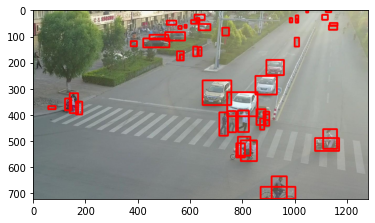

In [40]:
visualize(image, detections)

In [41]:
# Check if file has been saved or not
!(ls result.png && echo yes) || echo no

result.png
yes
